In [1]:
library(Seurat)
library(ggplot2)
library(cowplot)
library(dplyr)
library(future)
library(stringr)
library(ggpubr)
library(patchwork)
library(ggrepel)
library(Matrix)
library(slingshot)
library(pROC)
library(UCell)
library(ggraph)
library(circlize)
library(scales)
library(rstatix)
library(scDblFinder)
library(BiocParallel)
library(org.Mm.eg.db)
library(clusterProfiler)
library(enrichplot)
library(tibble)
library(tidydr)
library(corrplot)
library(harmony)
library(reshape2)
library(ComplexHeatmap)
library(RColorBrewer)
library(randomcoloR)
library(escape)
library(scatterpie)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: princurve

Loading required package: TrajectoryUtils

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The foll

In [2]:
register(MulticoreParam(workers = 8, progressbar = TRUE))
update_geom_defaults("point", aes(stroke = 0.1))
options(jupyter.plot_scale=1, future.globals.maxSize=100*1024*1024*1024)
`%nin%` = Negate(`%in%`)

# RNA

In [3]:
gex_path <- function(batch, sample) file.path('~/data1/eva/cellranger_out', batch, sample, 'outs/per_sample_outs', sample, 
                                  'count/sample_filtered_feature_bc_matrix')
b1_A <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_oct2022', 'A')), project = "b1_A", min.cells = 0, min.features = 1)
b1_A1 <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_oct2022', 'A1')), project = "b1_A1", min.cells = 0, min.features = 1)
b1_A2 <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_oct2022', 'A2')), project = "b1_A2", min.cells = 0, min.features = 1)
b1_B <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_oct2022', 'B')), project = "b1_B", min.cells = 0, min.features = 1)
b2_A <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_jun2023', 'A')), project = "b2_A", min.cells = 0, min.features = 1)
b2_B <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_jun2023', 'B')), project = "b2_B", min.cells = 0, min.features = 1)
b2_C <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_jun2023', 'C')), project = "b2_C", min.cells = 0, min.features = 1)
b2_D <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_jun2023', 'D')), project = "b2_D", min.cells = 0, min.features = 1)
b3_A <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_feb2024', 'A')), project = "b3_A", min.cells = 0, min.features = 1)
b3_B1 <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_feb2024', 'B1')), project = "b3_B1", min.cells = 0, min.features = 1)
b3_B2 <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_feb2024', 'B2')), project = "b3_B2", min.cells = 0, min.features = 1)
b3_C <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_feb2024', 'C')), project = "b3_C", min.cells = 0, min.features = 1)
b4_A <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_mar2024', 'A')), project = "b4_A", min.cells = 0, min.features = 1)
b4_B1 <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_mar2024', 'B1')), project = "b4_B1", min.cells = 0, min.features = 1)
b4_B2 <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_mar2024', 'B2')), project = "b4_B2", min.cells = 0, min.features = 1)
b4_C <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_mar2024', 'C')), project = "b4_C", min.cells = 0, min.features = 1)
b5_A <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_aug2024', 'A')), project = "b5_A", min.cells = 0, min.features = 1)
b5_B1 <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_aug2024', 'B1')), project = "b5_B1", min.cells = 0, min.features = 1)
b5_B2 <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_aug2024', 'B2')), project = "b5_B2", min.cells = 0, min.features = 1)
b5_C <- CreateSeuratObject(counts = Read10X(data.dir = gex_path('b16_aug2024', 'C')), project = "b5_C", min.cells = 0, min.features = 1)

In [4]:
seu <- merge(x = b1_A, y = list(b1_A1, b1_A2, b1_B, 
                                b2_A, b2_B, b2_C, b2_D, 
                                b3_A, b3_B1, b3_B2, b3_C, 
                                b4_A, b4_B1, b4_B2, b4_C,
                                b5_A, b5_B1, b5_B2, b5_C))
seu <- JoinLayers(seu)
seu

Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


An object of class Seurat 
32285 features across 97295 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

In [5]:
seu <- readRDS('data/b16_5batch.rds')

In [6]:
treatment_sample <- c('Control','αCTLA4 ID + VLP','αCTLA4 ID + VLP','αCTLA4 IV',
                      'αCTLA4 IV + VLP','αCTLA4 ID','αCTLA4 ID + VLP','VLP',
                      'αCTLA4 IV','αCTLA4 ID + VLP','αCTLA4 ID + VLP','Control',
                      'αCTLA4 ID','VLP','VLP','Control',
                      'αCTLA4 IV','αCTLA4 IV + VLP','αCTLA4 IV + VLP','αCTLA4 ID')
name_sample <- paste0('S',1:20)
samples <- unique(seu$orig.ident)
names(treatment_sample) <- unique(seu$orig.ident)
names(name_sample) <- unique(seu$orig.ident)
treatment_cell <- treatment_sample[seu$orig.ident]
name_cell <- name_sample[seu$orig.ident]
names(treatment_cell) <- NULL
names(name_cell) <- NULL
seu$treatment <- factor(treatment_cell, levels=c('Control','αCTLA4 IV','αCTLA4 IV + VLP','αCTLA4 ID','αCTLA4 ID + VLP','VLP'))
seu$sample <- factor(name_cell, levels=name_sample)
seu$aCTLA4 <- factor(recode(seu$treatment, 'Control'='none','αCTLA4 ID + VLP'='ID','αCTLA4 IV'='IV',
                    'αCTLA4 IV + VLP'='IV','αCTLA4 ID'='ID','VLP'='none'), levels=c('none','IV','ID'))
seu$VLP <- factor(recode(seu$treatment, 'Control'='none','αCTLA4 ID + VLP'='ID','αCTLA4 IV'='none',
                 'αCTLA4 IV + VLP'='ID','αCTLA4 ID'='none','VLP'='ID'), levels=c('none','ID'))
seu$batch <- str_split_fixed(seu$orig.ident,'_',2)[,1]
seu$percent.mt <- PercentageFeatureSet(seu, pattern='^mt')
qc1 <- ggplot(seu@meta.data %>% group_by(sample) %>% summarise(ncell=n()),aes(x=sample, y=ncell, fill=sample) ) + 
    geom_col() + geom_text(aes(label=ncell), vjust=0) + lims(y=c(0,9200)) +
    theme_cowplot() + ylab('Cell number') + scale_x_discrete(name='') +
    theme(legend.position='none', axis.title=element_text(size=13), axis.text=element_text(size=10))
qc2 <- ggplot(seu@meta.data,aes(x=sample,fill=sample,y=nFeature_RNA)) + geom_violin() + theme_cowplot() +
    scale_x_discrete(name='') + ylab('Detected gene') +
    theme(legend.position='none', axis.title=element_text(size=13))
qc3 <- ggplot(seu@meta.data,aes(x=sample,fill=sample,y=percent.mt)) + geom_violin() + theme_cowplot() +
    scale_x_discrete(name='') + ylab('Mitochondrial read percent') + 
    theme(legend.position='none', axis.title=element_text(size=13))
qc4 <- ggplot(seu@meta.data,aes(x=sample,fill=sample,y=nCount_RNA)) + geom_violin() + theme_cowplot() +
    scale_x_discrete(name='') + ylab('Number of read counts') +
    theme(legend.position='none', axis.title=element_text(size=13)) + lims(y=c(0,50000))

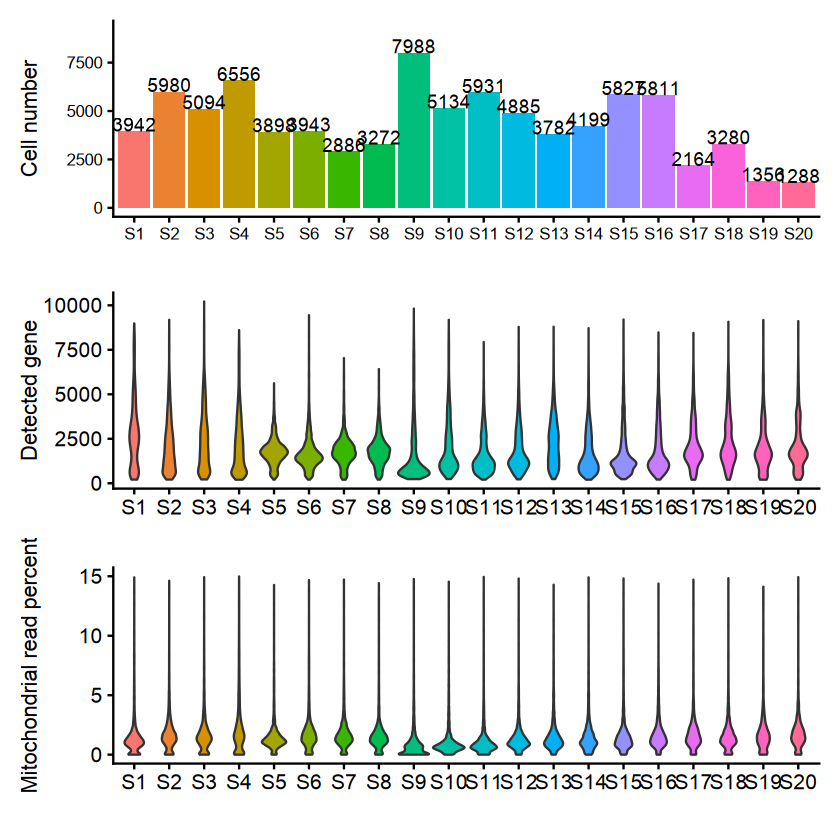

In [7]:
fig_qc <- qc1 + qc2 + qc3 +  plot_layout(ncol = 1) 
fig_qc

In [8]:
seu <- subset(seu, subset = nFeature_RNA > 200 & percent.mt < 15)
seu

An object of class Seurat 
32285 features across 87216 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, harmony, umap

In [9]:
sce <- as.SingleCellExperiment(seu)
sce <- scDblFinder(sce, samples="orig.ident", BPPARAM=MulticoreParam(20), dbr=0.03)
seu <- AddMetaData(seu, data.frame(sce@colData[c('scDblFinder.class','scDblFinder.score')]))
table(sce$scDblFinder.class)

Warning message in .check_reddim_names(x, value, withDimnames):
“non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.”
Warning message in .check_reddim_names(x, value, withDimnames):
“non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.”
Warning message in .check_reddim_names(x, value, withDimnames):
“non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.”



singlet doublet 
  82079    5137 

In [10]:
seu <- subset(seu, subset = scDblFinder.class == 'singlet')
seu

An object of class Seurat 
32285 features across 82079 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, harmony, umap

In [11]:
seu <- seu %>% NormalizeData(verbose = FALSE) %>% FindVariableFeatures(verbose = FALSE) %>% ScaleData() %>% 
    RunPCA(verbose = FALSE, npcs = 50) 

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”


In [12]:
seu <- seu %>% RunHarmony("batch")

Transposing data matrix

Initializing state using k-means centroids initialization

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4103950)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4103950)”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony converged after 4 iterations



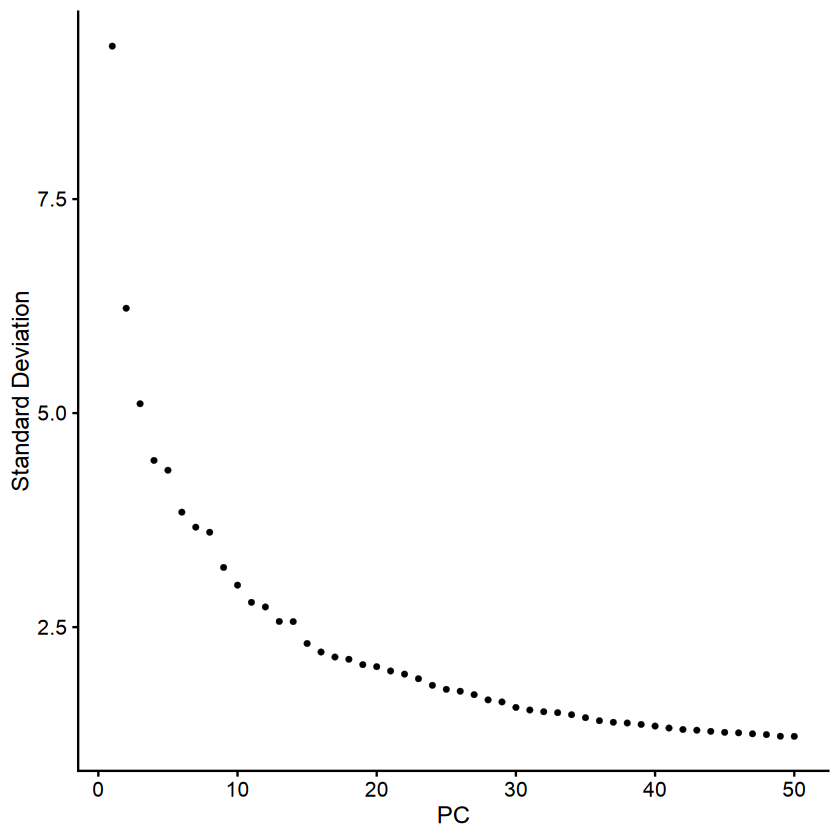

In [13]:
ElbowPlot(seu,50)

In [14]:
seu <- seu %>% 
    FindNeighbors(dims = 1:40, verbose=FALSE, k.param=10, reduction='harmony') %>% 
    FindClusters(resolution = 1.2, verbose=FALSE) %>% 
    RunUMAP(dims = 1:40, verbose=FALSE, min.dist=0.3, reduction='harmony') 

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


In [15]:
seu <- readRDS('data/b16_5batch.rds')

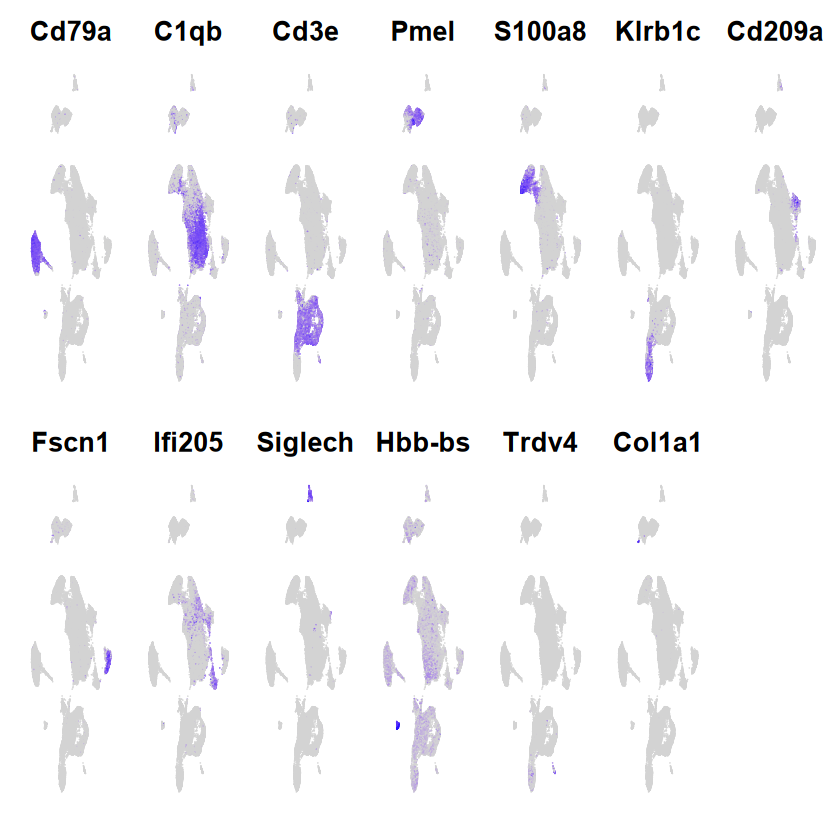

In [16]:
c_markers <- c('Cd79a','C1qb','Cd3e','Pmel','S100a8','Klrb1c','Cd209a','Fscn1','Ifi205','Siglech','Hbb-bs','Trdv4','Col1a1')
FeaturePlot(seu, c_markers, ncol=7) & NoLegend() & NoAxes()

ggsave('plot/b16_umap_canonical_markers_5batch.png', height=4, width=10, unit='in', device=png, dpi=500)

In [17]:
markers_cluster <- FindAllMarkers(seu, assay='RNA', only.pos=T, logfc.threshold=0.5)

Calculating cluster B

Calculating cluster Macro/Mono

Calculating cluster T

Calculating cluster Mela

Calculating cluster Neu

Calculating cluster NK

Calculating cluster cDC2

Calculating cluster MigDC

Calculating cluster cDC1

Calculating cluster pDC

Calculating cluster Eryth

Calculating cluster Tgd

Calculating cluster Fibro



In [18]:
seu$type <- recode(seu$seurat_clusters,
                   '1'='Macro/Mono','2'='Macro/Mono','6'='Macro/Mono','8'='Macro/Mono','9'='Macro/Mono',
                   '11'='Macro/Mono','12'='Macro/Mono','16'='Macro/Mono',
                   '21'='Macro/Mono','24'='Macro/Mono','26'='Macro/Mono','29'='Macro/Mono',
                   '3'='T','10'='T','14'='T','15'='T','17'='T','19'='T','22'='T','31'='T','33'='T','35'='Tgd',
                   '7'='NK',
                   '0'='B','34'='B',
                   '5'='Neu','27'='Neu',
                   '13'='cDC2',
                   '20'='MigDC','32'='MigDC',
                   '23'='cDC1',
                   '28'='pDC',
                   '4'='Mela','18'='Mela','25'='Mela',
                   '30'='Eryth',
                   '36'='Fibro'
                       )
Idents(seu) <- 'type'

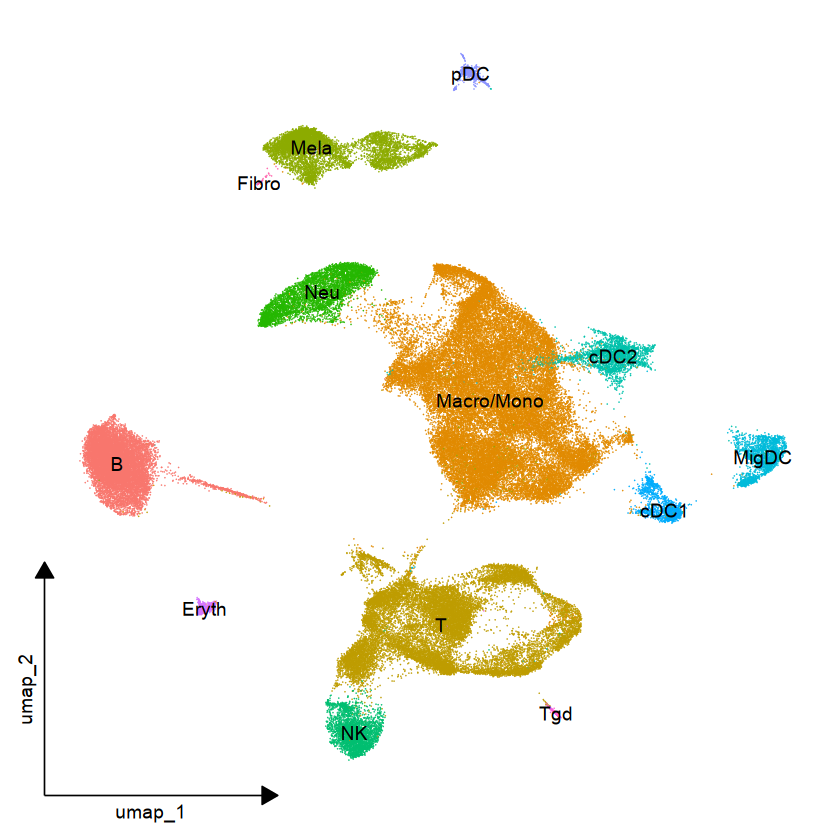

In [19]:
DimPlot(seu, label=T) + theme_dr() + theme(panel.grid=element_blank(), legend.position='none') 
#ggsave('plot/b16_umap_all_5batch.pdf', height=4, width=4, device=pdf)

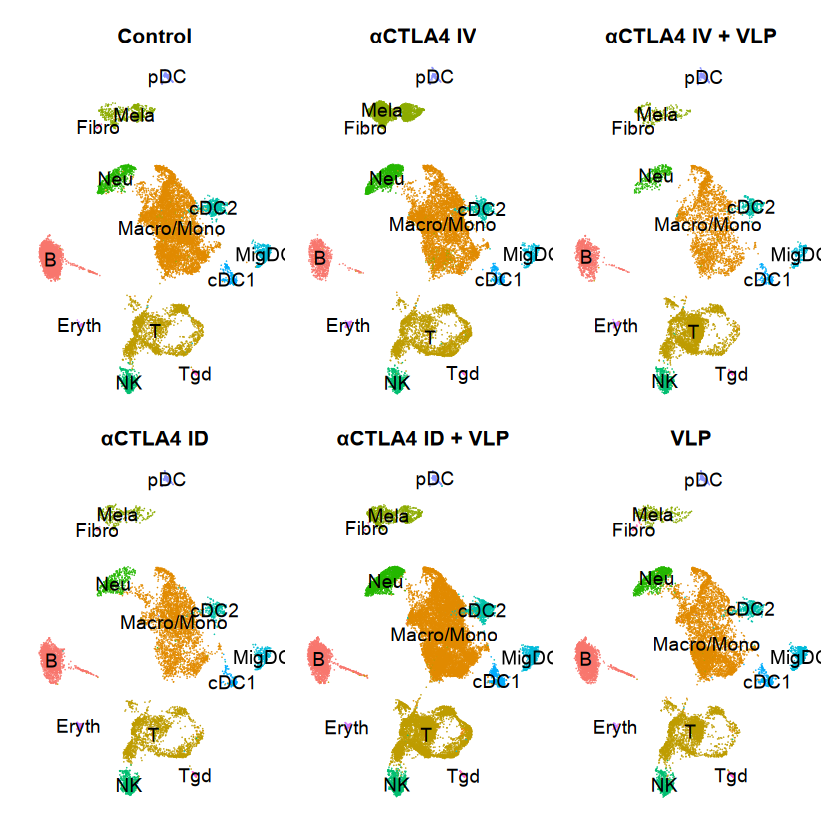

In [20]:
DimPlot(seu, label=TRUE, split.by='treatment', ncol=3) + NoLegend() + NoAxes()
ggsave('plot/b16_umap_all_5batch_by_treatment.png', height=8, width=11, device=png, dpi=100)

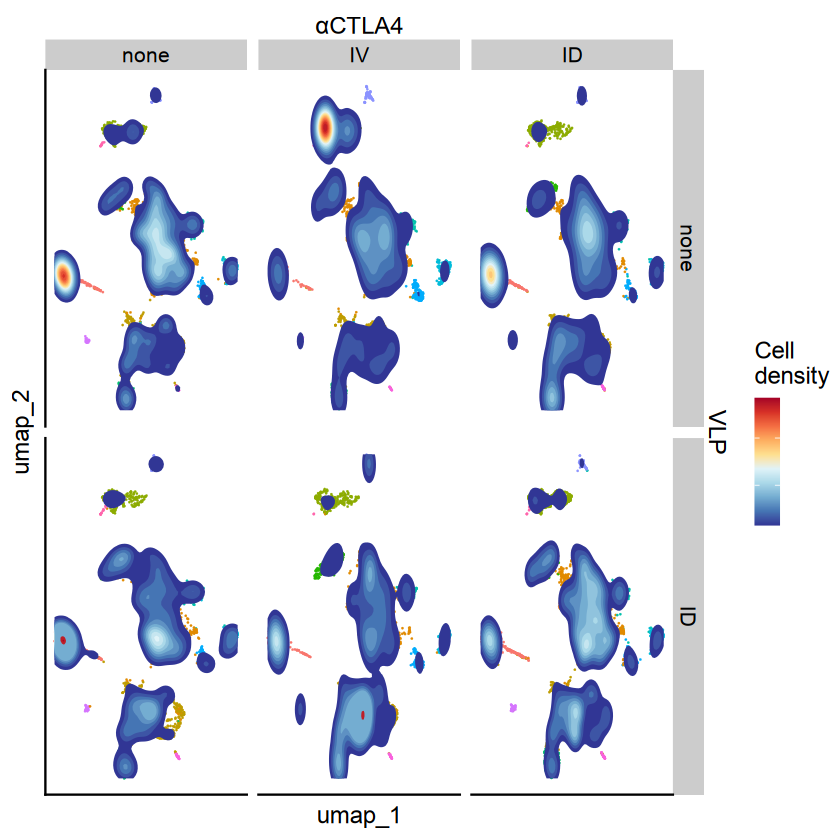

In [21]:
df_treatment_umap <- data.frame(seu@reductions$umap@cell.embeddings, seu@meta.data) %>%
    group_by(treatment) %>% 
    mutate(VLP=factor(VLP, levels=c('none','ID')), aCTLA4=factor(aCTLA4, levels=c('none','IV','ID')))
ggplot(df_treatment_umap, aes(x = umap_1, y = umap_2)) + 
  geom_point(aes(color = type), size=0.3) + 
  stat_density_2d(aes(fill=after_stat(level)), geom = "polygon", bins = 20) + 
  facet_grid(VLP~aCTLA4) + 
  scale_fill_gradientn(colors = rev(brewer.pal(10, "RdYlBu"))) + 
  labs(fill='Cell\ndensity') + guides(color='none') +
  theme_cowplot() + theme(axis.text=element_blank(), axis.ticks=element_blank(), legend.text=element_blank())  +
  scale_y_continuous(sec.axis = sec_axis(~ . , name = "VLP", breaks = NULL, labels = NULL)) +
  scale_x_continuous(sec.axis = sec_axis(~ . , name = "αCTLA4", breaks = NULL, labels = NULL))
ggsave('plot/b16_umap_density_5batch_by_treatment.pdf', height=5.5, width=9, device=cairo_pdf, bg='white')

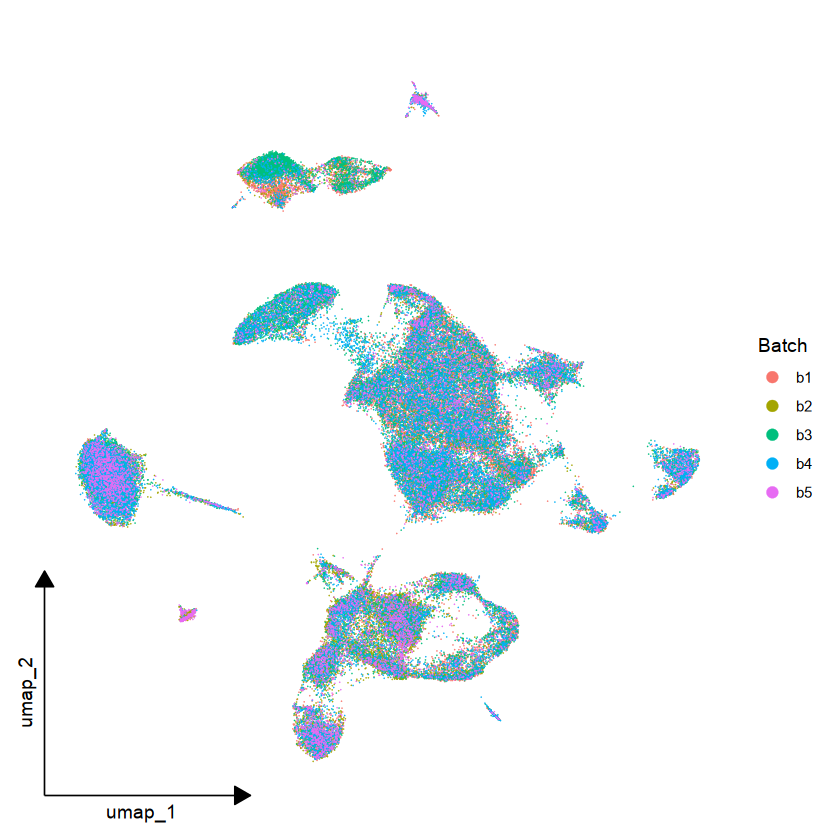

In [22]:
DimPlot(seu, label=F, group.by='batch') + theme_dr() + theme(panel.grid=element_blank()) +
    labs(title='', color='Batch')
ggsave('plot/b16_umap_all_by_batch.pdf', height=4, width=4, device=pdf)

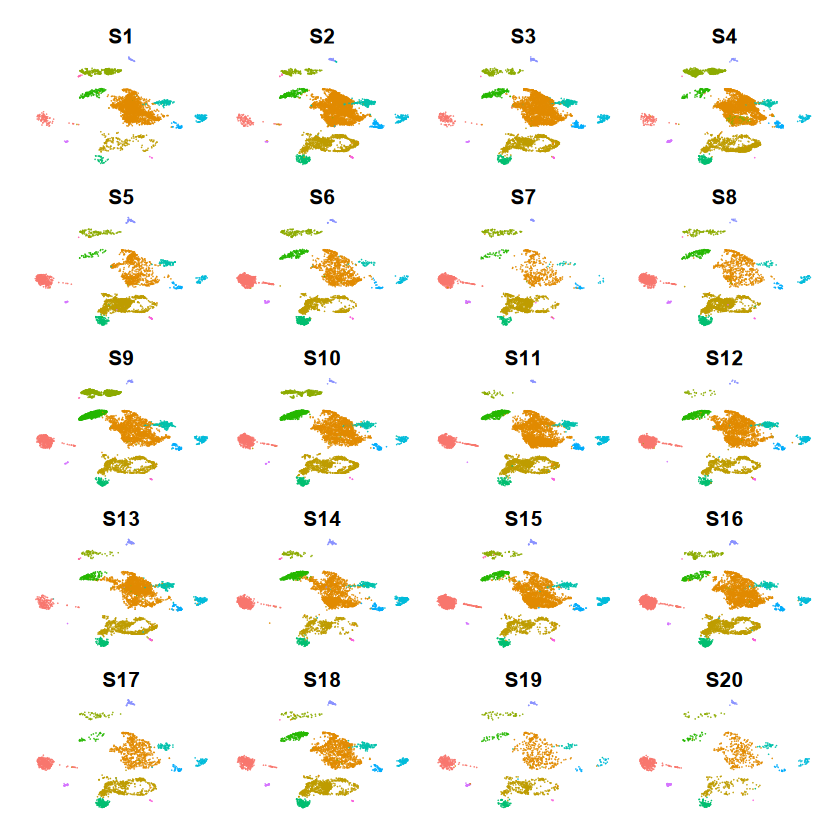

In [23]:
DimPlot(seu, label=F, split.by='sample', ncol=4) + NoAxes() + NoLegend()
ggsave('plot/b16_umap_all_5batch_by_sample.png', height=12.5, width=10, device=png, dpi=100)

`summarise()` has grouped output by 'type', 'VLP', 'aCTLA4', 'treatment', 'orig.ident'. You can override using the `.groups`
argument.
Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2 3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


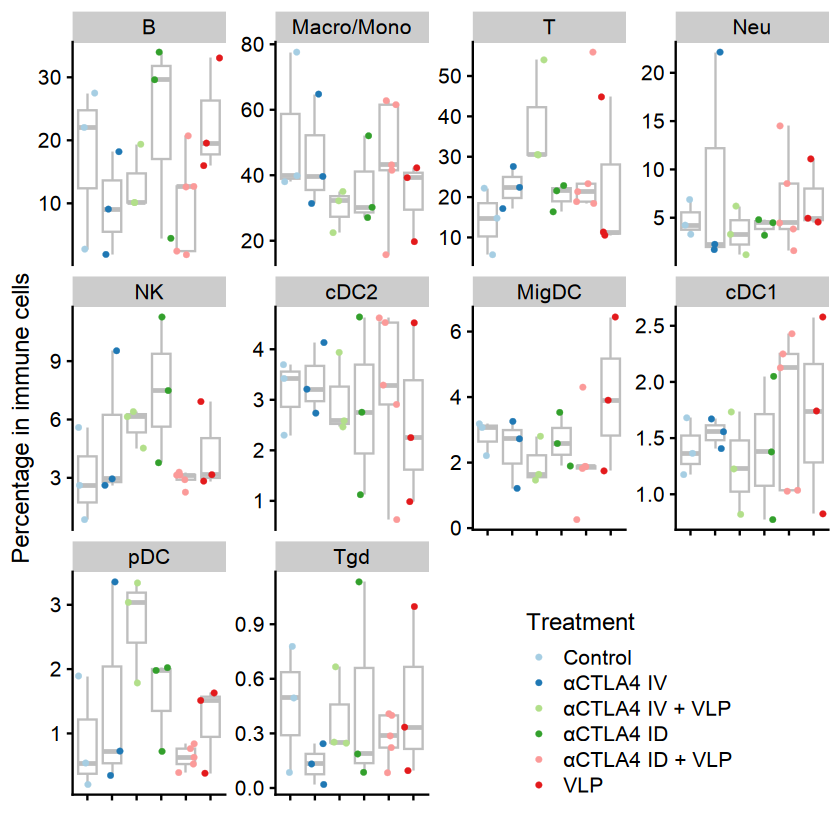

In [24]:
percent_df_im <- seu@meta.data %>% filter(type %in% c('B','T','Tgd','NK','Macro/Mono','cDC1','cDC2','pDC','MigDC','Neu')) %>% 
    group_by(type, VLP, aCTLA4, treatment, orig.ident, batch) %>% summarise(count=n()) %>% 
    ungroup() %>% group_by(orig.ident) %>% mutate(count_sample = sum(count)) %>% mutate(percentage = count/count_sample*100)  %>%
    mutate(VLP=factor(VLP, levels=c('none','ID')), aCTLA4=factor(aCTLA4, levels=c('none','IV', 'ID')))
ggplot(percent_df_im, aes(x=treatment, y=percentage, color=treatment)) + geom_boxplot(color='gray', alpha=0.5, outliers=F) + 
    theme_cowplot() + labs(x='',fill='treatment') + geom_jitter() +
    scale_color_brewer(palette='Paired') + labs(color='Treatment') +
    facet_wrap(~type, ncol=4, scales='free_y') + labs(x='', y='Percentage in immune cells') +
    stat_compare_means(ref.group='Control', label = "p.signif", method = "wilcox.test", hide.ns=T, vjust=1, show.legend=F) +
    theme_cowplot() + theme(legend.position=c(0.6,0.12), axis.text.x=element_blank())
ggsave('plot/b16_percent_immune_5batch.png', width=7, height=5, unit='in', dpi=100, bg='white', device=png)

`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.


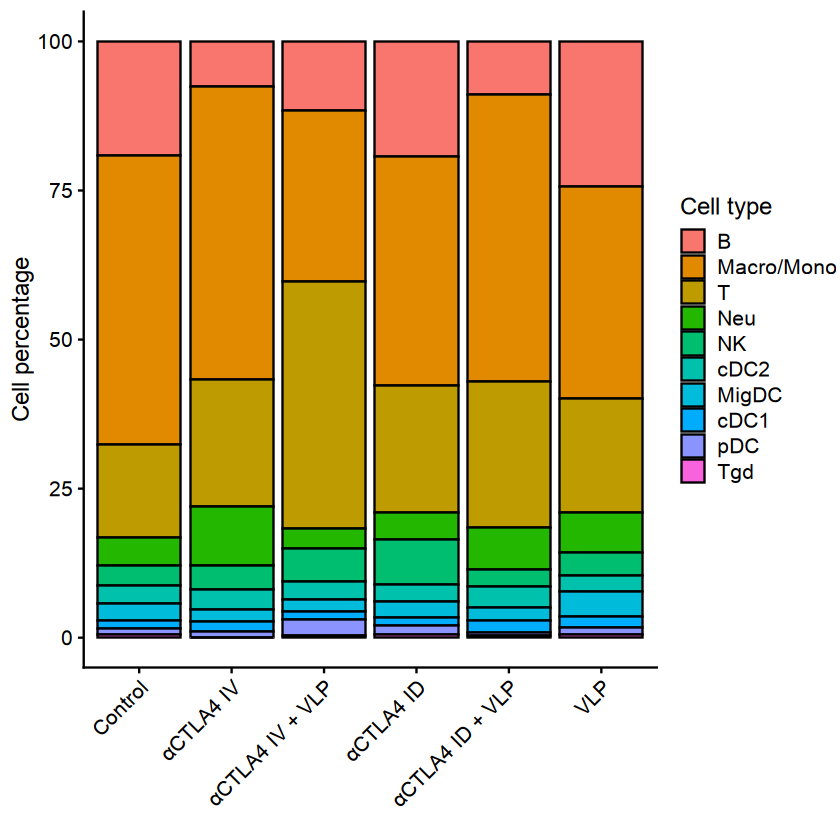

In [25]:
unique_types <- levels(seu$type)
type_colors <- hue_pal()(13)
names(type_colors) <- unique_types
percent_df_im_treatment <- seu@meta.data %>% filter(type %in% c('B','T','Tgd','NK','Macro/Mono','cDC1','cDC2','pDC','MigDC','Neu')) %>% 
    group_by(type, treatment) %>% summarise(count=n()) %>% 
    ungroup() %>% group_by(treatment) %>% mutate(count_sample = sum(count)) %>% mutate(percentage = count/count_sample*100)
ggplot(percent_df_im_treatment, aes(y=percentage, x=treatment, fill=type)) + geom_col(color='black') + theme_cowplot() +
    labs(x='', y='Cell percentage',fill='Cell type') + theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) + 
    scale_fill_manual(values=type_colors)
ggsave('plot/b16_bar_percent_immune_5batch.pdf', width=4, height=5, unit='in', bg='white', device=cairo_pdf)

In [26]:
percent_df <- seu@meta.data %>% group_by(type, orig.ident) %>% summarise(count=n()) %>% 
    ungroup() %>% group_by(orig.ident) %>% mutate(count_sample = sum(count)) %>% mutate(percentage = count/count_sample*100)
cell_number <- dcast(percent_df, type ~ orig.ident, value.var='count')
cell_number[is.na(cell_number)] <- 0
cell_number$type <- as.character(cell_number$type)
cell_number[nrow(cell_number) + 1,] <- c('sum', apply(cell_number[,-1], 2, sum))
write.csv(t(cell_number), 'csv/cell_number.csv', quote=F, row.names=T)

`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.


### scCODA

pdf 
  2

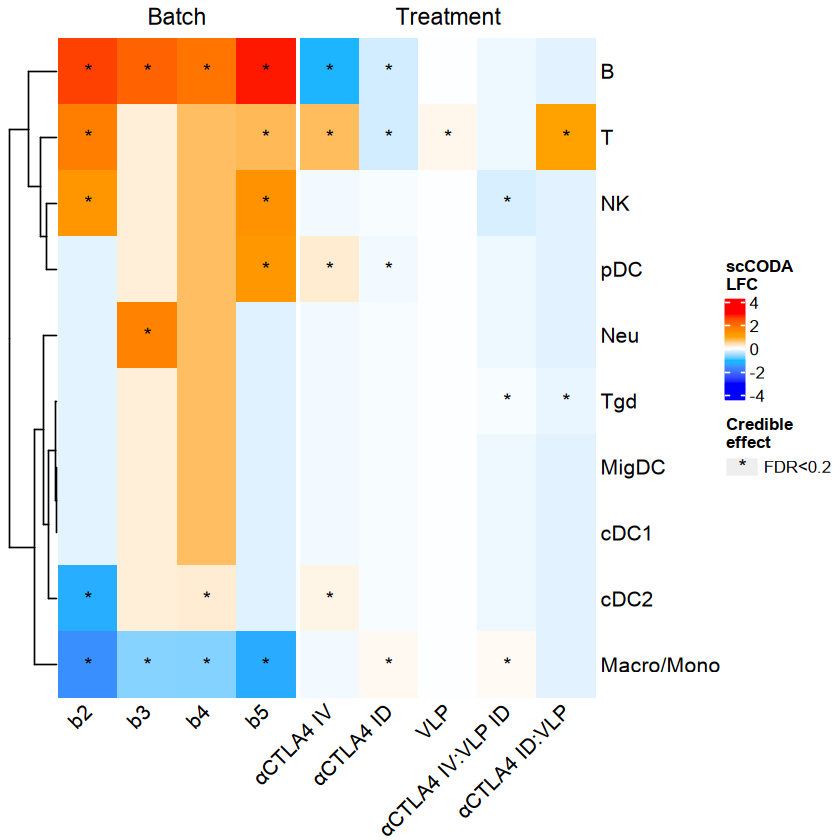

In [27]:
sccoda_df <- read.csv('csv/b16_type_sccoda.csv')
lfc_mat <- sccoda_df %>% dcast(Cell.Type~ Covariate, value.var='log2.fold.change') %>% 
    column_to_rownames('Cell.Type') %>% as.matrix()
credible_mat <- sccoda_df %>% mutate(sig=ifelse(abs(Final.Parameter)>1e-10, '*', '')) %>% 
    dcast(Cell.Type~ Covariate, value.var='sig') %>% column_to_rownames('Cell.Type')
colnames(lfc_mat) <- c('b2','b3','b4','b5','αCTLA4 ID','αCTLA4 IV','VLP','αCTLA4 ID:VLP','αCTLA4 IV:VLP')
lgd_sig <- Legend(title='Credible\neffect', pch = c('*'), type = "points", grid_width = unit(7, "mm"),
                  labels = c('FDR<0.2'))
lfc_mat <- lfc_mat[,c(1:4,6,5,7,9,8)]
credible_mat <- credible_mat[,c(1:4,6,5,7,9,8)]
ht <- Heatmap(lfc_mat, cluster_columns=F, name='scCODA\nLFC', col = colorRamp2(c(-3,-1,0,1,3),c('blue','deepskyblue','white','orange','red')),
       column_split = c(rep('Batch', 4),rep('Treatment', 5) ), column_names_rot = 45,
        cell_fun = function(j, i, x, y, w, h, col) { grid.text(credible_mat[i,j], x, y) })
draw(ht, annotation_legend_list = lgd_sig, legend_grouping = "original", merge_legend = TRUE)
cairo_pdf('plot/b16_immune_scCODA.pdf', width=5, height=4.5)
draw(ht, annotation_legend_list = lgd_sig, legend_grouping = "original", merge_legend = TRUE)
dev.off()

In [28]:
markers_type <- FindAllMarkers(seu, assay='RNA', only.pos=T, logfc.threshold=0.5)
write.csv(markers_type, 'csv/b16_celltype_markers.csv', quote=F, row.names=F)

Calculating cluster B

Calculating cluster Macro/Mono

Calculating cluster T

Calculating cluster Mela

Calculating cluster Neu

Calculating cluster NK

Calculating cluster cDC2

Calculating cluster MigDC

Calculating cluster cDC1

Calculating cluster pDC

Calculating cluster Eryth

Calculating cluster Tgd

Calculating cluster Fibro



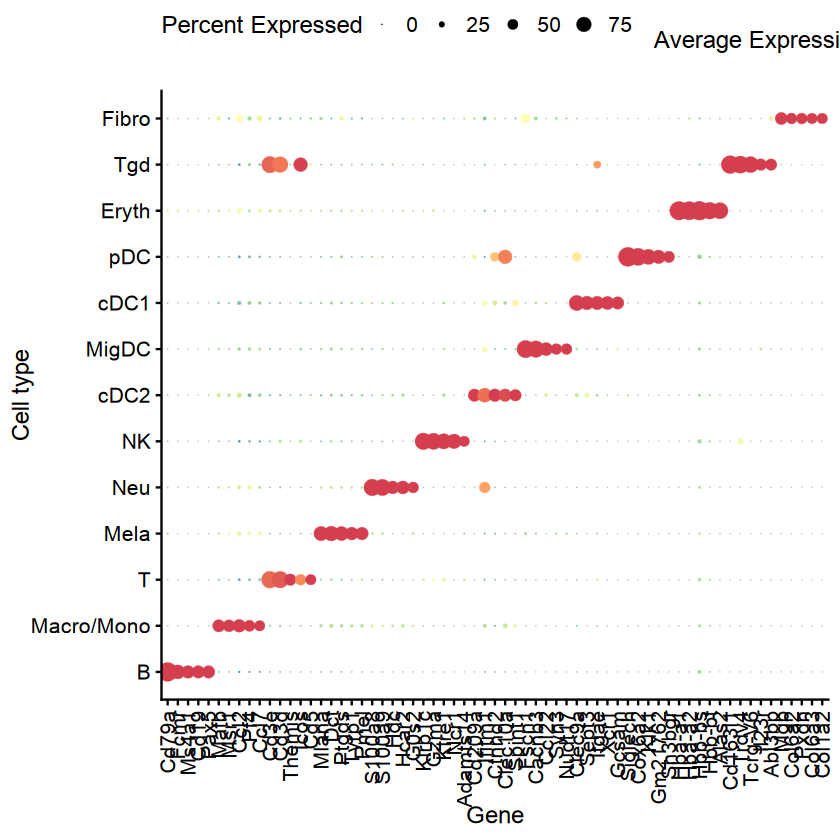

In [29]:
DotPlot(seu, features=markers_type %>% filter(pct.1>0.5) %>% group_by(cluster) %>% top_n(5, wt=avg_log2FC) %>% pull(gene) %>% unique(), # 
        dot.scale = 5, cols = 'Spectral') + labs(x='Gene', y='Cell type') + 
    theme(legend.position='top', axis.text.x=element_text(angle=90, hjust=1, vjust=0.5))
ggsave('plot/b16_cluster_marker_5batch.pdf', width=10, height=4, device=pdf)

In [30]:
write.csv(rownames(seu),'data/b16_gene.csv', quote=F, row.names=F)
write.csv(seu@meta.data[,c('orig.ident','type')],'data/b16_metadata.csv', quote=F)
writeMM(seu[['RNA']]$counts,'data/b16_count.mtx')
saveRDS(seu, 'data/b16_5batch.rds')

NULL